In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import sklearn.linear_model as linear_model
import  matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
intcols=[]
for column in train.columns:
    if str(train.dtypes[column])[:3] == 'int':
        intcols.append(column)

In [7]:
floatcols=[]
for column in train.columns:
    if str(train.dtypes[column])[:5] == 'float':
        floatcols.append(column)

In [8]:
objcols=[]
for column in train.columns:
    if str(train.dtypes[column])[:3] == 'obj':
        objcols.append(column)

In [9]:
len(intcols)+len(floatcols)+len(objcols)

81

data exploration

In [10]:
y = train['SalePrice']

In [11]:
train.shape

(1460, 81)

looking for NA in target

In [13]:
train['SalePrice'].isna().sum()

0

data cleaning

In [14]:
all_data = pd.concat([train,test],ignore_index = True)

In [15]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [16]:
# clean missing values

In [17]:
for column_name in all_data.columns:
    print('Nan value number in ' + str(column_name) + ' is '+ str(all_data[column_name].isna().sum()))

Nan value number in Id is 0
Nan value number in MSSubClass is 0
Nan value number in MSZoning is 4
Nan value number in LotFrontage is 486
Nan value number in LotArea is 0
Nan value number in Street is 0
Nan value number in Alley is 2721
Nan value number in LotShape is 0
Nan value number in LandContour is 0
Nan value number in Utilities is 2
Nan value number in LotConfig is 0
Nan value number in LandSlope is 0
Nan value number in Neighborhood is 0
Nan value number in Condition1 is 0
Nan value number in Condition2 is 0
Nan value number in BldgType is 0
Nan value number in HouseStyle is 0
Nan value number in OverallQual is 0
Nan value number in OverallCond is 0
Nan value number in YearBuilt is 0
Nan value number in YearRemodAdd is 0
Nan value number in RoofStyle is 0
Nan value number in RoofMatl is 0
Nan value number in Exterior1st is 1
Nan value number in Exterior2nd is 1
Nan value number in MasVnrType is 24
Nan value number in MasVnrArea is 23
Nan value number in ExterQual is 0
Nan value

In [18]:
all_data['BsmtFinSF1'].fillna(0, inplace = True)
all_data['BsmtFinSF2'].fillna(0, inplace = True)
all_data['BsmtUnfSF'].fillna(0, inplace = True)
all_data['TotalBsmtSF'].fillna(0, inplace = True)
all_data['BsmtFullBath'].fillna(0, inplace = True)
all_data['BsmtHalfBath'].fillna(0, inplace = True)
all_data['GarageCars'].fillna(0, inplace = True)
all_data['GarageArea'].fillna(0, inplace = True)
all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mode()[0], inplace = True)

In [19]:
#drop features with more than 2300 missing values
dropcolumns=[
'FireplaceQu',
'PoolQC',
'Fence',
'MiscFeature',
'Alley']

In [20]:
for column in dropcolumns:
    all_data.drop(columns = column,axis=1,inplace=True)

In [21]:
# fill mode
fill_mode_columns=[
'Utilities',
'MSZoning',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'SaleType' ,
'GarageYrBlt',
'BsmtFinType2',
'LotFrontage'
]

In [22]:
all_data['BsmtCond']=all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0])

In [23]:
for column in fill_mode_columns:
    all_data[column] = all_data[column].fillna(all_data[column].mode()[0])

In [24]:
for column_name in all_data.columns:
    print('Nan value number in ' + str(column_name) + ' is '+ str(all_data[column_name].isna().sum()))

Nan value number in Id is 0
Nan value number in MSSubClass is 0
Nan value number in MSZoning is 0
Nan value number in LotFrontage is 0
Nan value number in LotArea is 0
Nan value number in Street is 0
Nan value number in LotShape is 0
Nan value number in LandContour is 0
Nan value number in Utilities is 0
Nan value number in LotConfig is 0
Nan value number in LandSlope is 0
Nan value number in Neighborhood is 0
Nan value number in Condition1 is 0
Nan value number in Condition2 is 0
Nan value number in BldgType is 0
Nan value number in HouseStyle is 0
Nan value number in OverallQual is 0
Nan value number in OverallCond is 0
Nan value number in YearBuilt is 0
Nan value number in YearRemodAdd is 0
Nan value number in RoofStyle is 0
Nan value number in RoofMatl is 0
Nan value number in Exterior1st is 0
Nan value number in Exterior2nd is 0
Nan value number in MasVnrType is 0
Nan value number in MasVnrArea is 0
Nan value number in ExterQual is 0
Nan value number in ExterCond is 0
Nan value nu

In [25]:
all_data['BsmtCond']=all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0])

In [26]:
#Finish data cleaning

Then feature engineering

MSSibclass are actually obj

In [27]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [28]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
# total area in square feet
all_data['Years_from_built'] = 2022 - all_data['YearBuilt'].astype(int)
all_data['Years_from_remo'] = 2022 - all_data['YearRemodAdd'].astype(int)
all_data['Years_from_GarageBlt'] = 2022 - all_data['GarageYrBlt'].astype(int)
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath'] 

In [29]:
all_data.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)

check each datatype for each column and change quanlity rating into munbers with order.

In [30]:
#change to ordered numerical columns:
orderedcolumns=['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'GarageQual',
'GarageCond',
]

In [31]:
all_data['ExterQual']=all_data['ExterQual'].map({'Ex': 3, 'Fa': 0, 'Gd': 2, 'TA': 1})
all_data['BsmtQual']=all_data['BsmtQual'].map({'Ex': 3, 'Fa': 0, 'Gd': 2, 'TA': 1})
all_data['BsmtCond']=all_data['BsmtCond'].map({'Ex': 3, 'Fa': 0, 'Gd': 2, 'TA': 1})
all_data['BsmtExposure']=all_data['BsmtExposure'].map({'Av': 2, 'Gd': 3, 'Mn': 1, 'No': 0})   
all_data['ExterCond']=all_data['ExterCond'].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})
all_data['BsmtFinType1']=all_data['BsmtFinType1'].map({'ALQ': 4, 'BLQ': 3, 'GLQ': 5, 'LwQ': 1, 'Rec': 2, 'Unf': 0})
all_data['BsmtFinType2']=all_data['BsmtFinType2'].map({'ALQ': 4, 'BLQ': 3, 'GLQ': 5, 'LwQ': 1, 'Rec': 2, 'Unf': 0})
all_data['HeatingQC']=all_data['HeatingQC'].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})
all_data['CentralAir']=all_data['CentralAir'].map({'N': 0, 'Y': 1})
all_data['KitchenQual']=all_data['KitchenQual'].map({'Ex': 3, 'Fa': 0, 'Gd': 2, 'TA': 1})
all_data['GarageQual']=all_data['GarageQual'].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})
all_data['GarageCond']=all_data['GarageCond'].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})

log the skewed data

In [32]:
import scipy
from scipy.stats import skew

In [33]:
skew_df = pd.DataFrame(all_data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(all_data[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Id,0.000000,0.000000,False
1,LotFrontage,1.784677,1.784677,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,MasVnrArea,2.613592,2.613592,True
6,ExterQual,0.786382,0.786382,True
7,ExterCond,1.315913,1.315913,True
8,BsmtQual,0.302074,0.302074,False
9,BsmtCond,NaN,NaN,False


In [34]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    all_data[column] = np.log1p(all_data[column])

deal with month values (circular data)

In [35]:
all_data['MoSold']=all_data['MoSold'].astype(int)

In [36]:
all_data['MoSold'] = -np.cos(0.5236 * all_data['MoSold'])

get rid of ID

In [37]:
final_features = all_data.drop(columns=['Id','SalePrice'])

get dummies

In [38]:
final_features = pd.get_dummies(final_features).reset_index(drop=True)

In [39]:
final_features

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,5.283204,1.098612,1.098612,2,1.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,0.000000,0.693147,1.098612,2,1.0,1.386294,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,5.093750,1.098612,1.098612,2,1.0,0.693147,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,0.000000,0.693147,1.098612,1,2.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,5.860786,1.098612,1.098612,2,1.0,1.098612,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,0.000000,0.693147,1.098612,1,1.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,0.000000,0.693147,1.098612,1,1.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,0.000000,0.693147,1.098612,1,1.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,0.000000,0.693147,1.098612,2,1.0,1.098612,...,0,0,0,1,0,0,0,0,1,0


In [40]:
final_features['BsmtCond']=final_features['BsmtCond'].fillna(final_features['BsmtCond'].mode()[0])

y is also skewed, use np.log1p

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

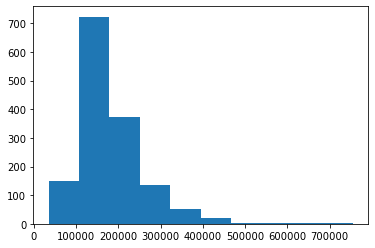

In [41]:
plt.hist(y)

In [42]:
scipy.stats.skew(y)

1.880940746034036

In [43]:
log_y=np.log1p(y)

In [44]:
log_y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

scale the final feature dataframe

In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaler

StandardScaler()

In [47]:
final_features_scaled = scaler.fit_transform(final_features)
final_features_scaled

array([[ 0.02387031, -0.10371897,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.66020723,  0.14654351, -0.06318454, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.16199077,  0.45762904,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [ 2.7947135 ,  1.5861721 , -0.77255247, ..., -0.12653513,
        -2.15546626, -0.30269297],
       [-0.12067662,  0.31125467, -0.77255247, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.42107399,  0.15205212,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297]])

find out which model is the best

In [48]:
from pycaret.regression import setup, compare_models

In [49]:
final_features.isna().sum().to_numpy().nonzero() 

(array([], dtype=int64),)

In [50]:
final_features_scaled[0:1460]
# train excel

array([[ 0.02387031, -0.10371897,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.66020723,  0.14654351, -0.06318454, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.16199077,  0.45762904,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [ 0.07059598,  0.02909175,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.16199077,  0.17030323, -0.77255247, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.46222954,  0.21421494, -0.77255247, ..., -0.12653513,
         0.46393674, -0.30269297]])

In [51]:
_ = setup(data=pd.concat([pd.DataFrame(final_features_scaled[0:1460], columns = final_features.columns), log_y], axis=1), target='SalePrice')

,Description,Value
0,session_id,6488
1,Target,SalePrice
2,Original Data,"(1460, 246)"
3,Missing Values,False
4,Numeric Features,52
5,Categorical Features,193
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 237)"


In [52]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0810,0.0150,0.1203,0.9026,0.0094,0.0068,0.0360
ridge,Ridge Regression,0.0830,0.0155,0.1228,0.8981,0.0096,0.0070,0.0110
gbr,Gradient Boosting Regressor,0.0903,0.0176,0.1310,0.8868,0.0102,0.0076,0.1880
lightgbm,Light Gradient Boosting Machine,0.0912,0.0181,0.1331,0.8827,0.0104,0.0076,0.1900
et,Extra Trees Regressor,0.0940,0.0190,0.1363,0.8780,0.0106,0.0079,0.4330
omp,Orthogonal Matching Pursuit,0.0953,0.0197,0.1381,0.8733,0.0107,0.0080,0.0100
huber,Huber Regressor,0.0922,0.0196,0.1383,0.8715,0.0108,0.0077,0.1670
rf,Random Forest Regressor,0.0958,0.0200,0.1396,0.8713,0.0109,0.0080,0.3800
par,Passive Aggressive Regressor,0.1143,0.0267,0.1628,0.8237,0.0126,0.0096,0.0330
ada,AdaBoost Regressor,0.1300,0.0293,0.1707,0.8087,0.0133,0.0109,0.1410


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

split data

In [53]:
X_train_test = final_features_scaled[:1460]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, log_y, test_size=0.3)

In [55]:
X_train.shape

(1022, 245)

start baysian as baseline model

In [56]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import optuna

In [58]:
#clf_R = Ridge(alpha=1.0)
clf_BR = linear_model.BayesianRidge()
clf_BR.fit(X_train,y_train)
#clf_R.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

hyperparameter optimization

In [61]:
kf = KFold(n_splits=10)

In [62]:
def br_objective(trial):
     n_iter = trial.suggest_int('n_iter', 50, 600)
     tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
     alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
     alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
     lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
     lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
     model = linear_model.BayesianRidge(
         n_iter=n_iter,
         tol=tol,
         alpha_1=alpha_1,
         alpha_2=alpha_2,
         lambda_1=lambda_1,
         lambda_2=lambda_2
     )
    
     model.fit(X_train,y_train)
    
     cv_scores = np.exp(np.sqrt(-cross_val_score(model, X_train,y_train, scoring='neg_mean_squared_error', cv=kf)))
    
     return np.mean(cv_scores)

In [63]:
study = optuna.create_study(direction='minimize')
study.optimize(br_objective, n_trials=100)

[I 2021-12-25 11:33:24,943] A new study created in memory with name: no-name-ab143971-5e56-48e3-b1a7-721cd645800c
[I 2021-12-25 11:33:26,104] Trial 0 finished with value: 1.1332728396756433 and parameters: {'n_iter': 217, 'tol': 0.015868271286015777, 'alpha_1': 7.273392087658898e-07, 'alpha_2': 2.401169676020599e-07, 'lambda_1': 0.0005210962209800149, 'lambda_2': 8.11795728400497e-08}. Best is trial 0 with value: 1.1332728396756433.
[I 2021-12-25 11:33:27,232] Trial 1 finished with value: 1.1382960046320192 and parameters: {'n_iter': 304, 'tol': 4.414192973647479e-05, 'alpha_1': 0.03059499598920384, 'alpha_2': 0.00018060906912605086, 'lambda_1': 8.312016048285065e-07, 'lambda_2': 0.057503077358451817}. Best is trial 0 with value: 1.1332728396756433.
[I 2021-12-25 11:33:28,383] Trial 2 finished with value: 1.1410872302540027 and parameters: {'n_iter': 475, 'tol': 2.589475056525264e-07, 'alpha_1': 0.49248188959572575, 'alpha_2': 4.827869700216258, 'lambda_1': 0.0026210246197287527, 'lamb

[I 2021-12-25 11:33:55,799] Trial 25 finished with value: 1.1321125763716573 and parameters: {'n_iter': 248, 'tol': 2.5826345180511504e-07, 'alpha_1': 1.7527760671068569e-06, 'alpha_2': 1.6966390784955907, 'lambda_1': 0.314460921532774, 'lambda_2': 1.2726646006799196e-05}. Best is trial 25 with value: 1.1321125763716573.
[I 2021-12-25 11:33:56,967] Trial 26 finished with value: 1.1311422124056896 and parameters: {'n_iter': 245, 'tol': 1.1131225201702479e-07, 'alpha_1': 0.0002431042729400231, 'alpha_2': 5.701896797449527, 'lambda_1': 0.004228723294292028, 'lambda_2': 9.299734375998205e-06}. Best is trial 26 with value: 1.1311422124056896.
[I 2021-12-25 11:33:58,140] Trial 27 finished with value: 1.1311004472563984 and parameters: {'n_iter': 270, 'tol': 1.6301944604357652e-08, 'alpha_1': 0.0008422684172833618, 'alpha_2': 7.938624029952241, 'lambda_1': 0.009136705785724644, 'lambda_2': 1.0364742371017769e-05}. Best is trial 27 with value: 1.1311004472563984.
[I 2021-12-25 11:33:59,313] Tr

[I 2021-12-25 11:34:26,042] Trial 50 finished with value: 1.1334910897116823 and parameters: {'n_iter': 344, 'tol': 2.3091838636834366e-07, 'alpha_1': 0.8982111672900964, 'alpha_2': 4.135852576058029, 'lambda_1': 0.017470755576637714, 'lambda_2': 0.015900580460229588}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:27,216] Trial 51 finished with value: 1.1312142210259823 and parameters: {'n_iter': 239, 'tol': 1.004416033658836e-08, 'alpha_1': 0.00020021258491964206, 'alpha_2': 9.831020515311144, 'lambda_1': 0.004426354505228298, 'lambda_2': 9.159142986029096e-06}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:28,529] Trial 52 finished with value: 1.132008114023856 and parameters: {'n_iter': 229, 'tol': 8.502313757365104e-08, 'alpha_1': 0.00017028759380060215, 'alpha_2': 1.9416155690490982, 'lambda_1': 0.00158351444513327, 'lambda_2': 1.4173728612405552e-05}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:29,704] Trial 5

[I 2021-12-25 11:34:55,729] Trial 75 finished with value: 1.1312106534079176 and parameters: {'n_iter': 373, 'tol': 7.556216151120241e-08, 'alpha_1': 0.41361590917139696, 'alpha_2': 9.791968456246213, 'lambda_1': 0.021727536440279853, 'lambda_2': 4.186220663536723e-06}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:56,921] Trial 76 finished with value: 1.132973110751229 and parameters: {'n_iter': 311, 'tol': 1.432180256719279e-07, 'alpha_1': 0.003901063357926025, 'alpha_2': 0.2867633582723119, 'lambda_1': 1.4933056586127111, 'lambda_2': 2.2392628278561763e-05}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:58,112] Trial 77 finished with value: 1.131709040582047 and parameters: {'n_iter': 106, 'tol': 3.610174490161367e-08, 'alpha_1': 0.17869830018565297, 'alpha_2': 2.701972954395422, 'lambda_1': 0.0008999092454685234, 'lambda_2': 1.0326334488468305e-07}. Best is trial 31 with value: 1.1310895601854956.
[I 2021-12-25 11:34:59,260] Trial 78 fi

In [64]:
study.best_params

{'n_iter': 257,
 'tol': 1.159186217469619e-07,
 'alpha_1': 0.6170303609973629,
 'alpha_2': 7.218200136047317,
 'lambda_1': 0.11518796381604277,
 'lambda_2': 2.3059669281094662e-06}

In [75]:
BR_best_hyperpara = study.best_params

In [76]:
clf_BR = linear_model.BayesianRidge(**BR_best_hyperpara)
clf_BR.fit(X_train,y_train)

BayesianRidge(alpha_1=0.6170303609973629, alpha_2=7.218200136047317,
              alpha_init=None, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=0.11518796381604277,
              lambda_2=2.3059669281094662e-06, lambda_init=None, n_iter=257,
              normalize=False, tol=1.159186217469619e-07, verbose=False)

In [77]:
np.exp(np.sqrt(-cross_val_score(clf_BR, X_train_test, log_y, scoring='neg_mean_squared_error', cv=kf)))

array([1.11664317, 1.0993774 , 1.12488137, 1.16495893, 1.15505626,
       1.128427  , 1.1290329 , 1.10918894, 1.17514257, 1.13562085])

In [78]:
#kf = KFold(n_splits=10)
#np.exp(np.sqrt(-cross_val_score(clf_R, X_train_test, log_y, scoring='neg_mean_squared_error', cv=kf)))

In [79]:
Bayesianridge_predict = clf_BR.predict(final_features_scaled[1460:])

In [80]:
#Ridge_predict = clf_R.predict(final_features_scaled[1460:])

In [81]:
#final_predict = 0.5* Bayesianridge_predict + 0.5* Ridge_predict

In [82]:
submission = pd.concat([test['Id'], np.exp(pd.Series(Bayesianridge_predict, name='SalePrice'))], axis=1)
submission

,Id,SalePrice
0,1461,122350.455509
1,1462,158607.231941
2,1463,180171.894677
3,1464,194518.547024
4,1465,200470.999979
...,...,...
1454,2915,84231.440351
1455,2916,81902.838959
1456,2917,163046.608534
1457,2918,123758.515633


In [83]:
submission.to_csv('./submission.csv', index=False, header=True)

In [84]:
# pure bayesain ridge without tuning hyperparameter 0.13052 baseline model 
# 0.5 bayesain ridge + 0.5 ridge  0.13139
# bayesain ridge with tuning hyperparameter by optuna 0.12951

In [ ]:
# Reference: https://www.kaggle.com/gcdatkin/top-10-house-price-regression-competition-nb